In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
buildloc = r'K:\vanderVoortN\FRC\dev\Fit2DGaussian_fresh\build\Debug'
sys.path.append(buildloc)
import GaussFits
from findPeaksLib import *
import precisionFuncs

In [4]:
from scipy.ndimage import gaussian_filter

# test the localisation of a single Gaussian spot, compared to theory 

In [146]:
def skim(data, lim = 20):
    return data[abs(data) < lim]

In [147]:
runs = 100
a = 1 #pxSize for Mortensen precision
dimx = 20
dimy = 20
model = np.zeros([20,20])
lim = 20 #if du, dv is larger than lim, they are kicked out
dx = np.zeros(runs)#x,y for Mortensen
dy = np.zeros(runs)
du = np.zeros(runs)#u,v for C
dv = np.zeros(runs)
params0 = np.array([10, #x0
                    10,#y0
                    5, #A0
                    3, #sigma
                    1,#eps
                    0.001, #bg
                    0, # x1
                    0, #y1
                    0, #A1
                    0, #x2
                    0, #y2
                    0, #A2
                    0, #info
                    0, #wi_nowi
                    1, #fitbg
                    1, #ellipt_circ
                    0, #model
                    0]) # two Istar
model = GaussFits.model2DGaussian(params0, model)
for run in range(runs):
    im = np.random.poisson(model)
    paramsM = np.array([params0[0], params0[1], params0[3], params0[5], params0[2] * 2 * np.pi * params0[3] ** 2])
    paramsM_rand = paramsM * (0.8 + 0.4 * np.random.random(5))
    x, y, *_ = precisionFuncs.logLikelihood(paramsM_rand, a, im)
    dx[run] = x - (paramsM[0] + 0.5)
    dy[run] = y - (paramsM[1] + 0.5)
    paramsC_rand = params0.copy()
    for i in [0,1,2,3,5]:
        paramsC_rand[i] *= (0.8 + 0.4 * np.random.random())
    #u, v, *_ = GaussFits.Fit2DGauss(paramsC_rand, im)
    fitC = GaussFits.Fit2DGauss(paramsC_rand, im)
    u = fitC[0]
    v = fitC[1]
    lmmsg = fitC[12]
    print(lmmsg)
    du[run] = u - params0[0]
    dv[run] = v - params0[1]
stdtheor = np.sqrt(precisionFuncs.findVar(paramsM, a))
stdM = np.sqrt ( np.std(dx)**2 + np.std(dy)**2) / np.sqrt(2)
stdC = np.sqrt ( np.std(skim(du))**2 + np.std(skim(dv))**2) / np.sqrt(2)
print("mean of dx is %.2f and mean of dy is %.2f" %(np.mean(dx), np.mean(dy)))
print("mean of du is %.2f and mean of dv is %.2f" %(np.mean(du), np.mean(dv)))

4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
1.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
integral in variance has value -0.000024
mean of dx is -0.01 and mean of dy is 0.01
mean of du is 0.01 and mean of dv is -0.01


In [148]:
len(skim(du))

100

theoretical precision is 1.784 nm
Precision using python optimisation is 1.734 nm
Precision using c optimisation is 1.728 nm
Gaussian spot with FWHM 70 and 282 photons with background 0.00 cnts/px.


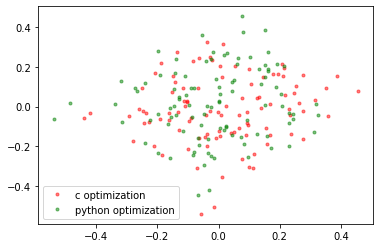

In [149]:
wdir = r'K:\vanderVoortN\FRC\dev\Fit2DGaussian_fresh\test\SingleSpot'
try:
    os.mkdir(wdir)
except:
    pass
pxSize = 10
print('theoretical precision is %.3f nm' % (stdtheor * pxSize))
print('Precision using python optimisation is %.3f nm' % (stdM * pxSize))
print('Precision using c optimisation is %.3f nm' % (stdC * pxSize))
print('Gaussian spot with FWHM %.0f and %i photons with background %.2f cnts/px.' % 
      (paramsM[2] * 2.35 * pxSize, paramsM[4].astype(np.int), paramsM[3]))
plt.plot(skim(du), skim(dv), 'r.', alpha = 0.5, label = 'c optimization')
plt.plot(dx, dy, 'g.', alpha = 0.5, label = 'python optimization')
plt.legend()
plt.savefig(os.path.join(wdir, 'single-spot-localisations.png'), dpi = 300, bbox_inches = 'tight')

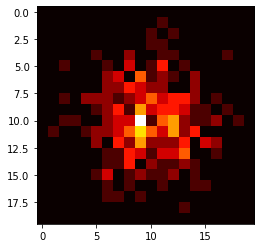

In [150]:
plt.imshow(im, cmap = 'hot')
plt.savefig(os.path.join(wdir, 'single-spot-example.png'), dpi = 300, bbox_inches = 'tight')

In [151]:
runs = 100
a = 1 #pxSize for Mortensen precision
dimx = 20
dimy = 20
model = np.zeros([20,20])
lim = 20 #if du, dv is larger than lim, they are kicked out
dx = np.zeros(runs)#x,y for Mortensen
dy = np.zeros(runs)
du = np.zeros(runs)#u,v for C
dv = np.zeros(runs)
params0 = np.array([10, #x0
                    10,#y0
                    5, #A0
                    3, #sigma
                    1,#eps
                    0.001, #bg
                    0, # x1
                    0, #y1
                    0, #A1
                    0, #x2
                    0, #y2
                    0, #A2
                    0, #info
                    0, #wi_nowi
                    0, #fitbg
                    1, #ellipt_circ
                    0, #model
                    0]) # two Istar
model = GaussFits.model2DGaussian(params0, model)
for run in range(runs):
    im = np.random.poisson(model)
    paramsM = np.array([params0[0], params0[1], params0[3], params0[5], params0[2] * 2 * np.pi * params0[3] ** 2])
    paramsM_rand = paramsM * (0.8 + 0.4 * np.random.random(5))
    x, y, *_ = precisionFuncs.logLikelihood(paramsM_rand, a, im)
    dx[run] = x - (paramsM[0] + 0.5)
    dy[run] = y - (paramsM[1] + 0.5)
    paramsC_rand = params0.copy()
    for i in [0,1,2,3,5]:
        paramsC_rand[i] *= (0.8 + 0.4 * np.random.random())
    #u, v, *_ = GaussFits.Fit2DGauss(paramsC_rand, im)
    fitC = GaussFits.Fit2DGauss(paramsC_rand, im)
    u = fitC[0]
    v = fitC[1]
    lmmsg = fitC[12]
    print(lmmsg)
    du[run] = u - params0[0]
    dv[run] = v - params0[1]
stdtheor = np.sqrt(precisionFuncs.findVar(paramsM, a))
stdM = np.sqrt ( np.std(dx)**2 + np.std(dy)**2) / np.sqrt(2)
stdC = np.sqrt ( np.std(skim(du))**2 + np.std(skim(dv))**2) / np.sqrt(2)
print("mean of dx is %.2f and mean of dy is %.2f" %(np.mean(dx), np.mean(dy)))
print("mean of du is %.2f and mean of dv is %.2f" %(np.mean(du), np.mean(dv)))

4.0
4.0
2.0
2.0
2.0
2.0
2.0
4.0
2.0
2.0
2.0
4.0
2.0
4.0
-1.0
2.0
1.0
2.0
2.0
-1.0
4.0
1.0
2.0
2.0
-1.0
2.0
2.0
4.0
4.0
1.0
1.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
-1.0
2.0
2.0
2.0
2.0
2.0
2.0
-1.0
2.0
2.0
2.0
2.0
2.0
4.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
1.0
-1.0
2.0
2.0
2.0
2.0
4.0
-1.0
2.0
2.0
2.0
2.0
-1.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
4.0
2.0
2.0
2.0
-1.0
2.0
2.0
2.0
4.0
4.0
2.0
2.0
2.0
-1.0
2.0
4.0
2.0
2.0
integral in variance has value -0.000024
mean of dx is 0.00 and mean of dy is -0.01
mean of du is -271034521101.68 and mean of dv is -409638474850.59


theoretical precision is 1.784 nm
Precision using python optimisation is 1.828 nm
Precision using c optimisation is 8.501 nm
Gaussian spot with FWHM 70 and 282 photons with background 0.00 cnts/px.


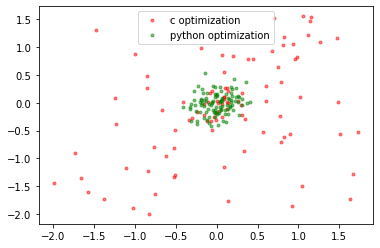

In [152]:
wdir = r'K:\vanderVoortN\FRC\dev\Fit2DGaussian_fresh\test\SingleSpot'
try:
    os.mkdir(wdir)
except:
    pass
pxSize = 10
print('theoretical precision is %.3f nm' % (stdtheor * pxSize))
print('Precision using python optimisation is %.3f nm' % (stdM * pxSize))
print('Precision using c optimisation is %.3f nm' % (stdC * pxSize))
print('Gaussian spot with FWHM %.0f and %i photons with background %.2f cnts/px.' % 
      (paramsM[2] * 2.35 * pxSize, paramsM[4].astype(np.int), paramsM[3]))
plt.plot(skim(du), skim(dv), 'r.', alpha = 0.5, label = 'c optimization')
plt.plot(dx, dy, 'g.', alpha = 0.5, label = 'python optimization')
plt.legend()
plt.savefig(os.path.join(wdir, 'single-spot-localisations-bf-free.png'), dpi = 300, bbox_inches = 'tight')

# test the localisation of three Gaussian spots

In [153]:
runs = 100
a = 1 #pxSize for Mortensen precision
dimx = 20
dimy = 20
model = np.zeros([20,20])
lim = 20 #if du, dv is larger than lim, they are kicked out
pos = np.zeros([runs, 6])#coordinates for found params
dpos = np.zeros([runs, 6])#coordinate erros for found params
params0 = np.array([5, #x0
                    5,#y0
                    5, #A0
                    3, #sigma
                    1,#eps
                    0.2, #bg
                    10, # x1
                    10, #y1
                    5, #A1
                    15, #x2
                    5, #y2
                    5, #A2
                    0, #info
                    0, #wi_nowi
                    0, #fitbg
                    1, #ellipt_circ
                    2, #model
                    0]) # two Istar
pos0 = np.array([params0[0], params0[1], params0[6], params0[7], params0[9], params0[10]])
model = GaussFits.modelThree2DGaussian(params0, model)
for run in range(runs):
    im = np.random.poisson(model)
    paramsC_rand = params0.copy()
    for i in [0, 1, 2, 3, 6, 7, 8, 9, 10, 11]:
        paramsC_rand[i] *= (0.99 + 0.02 * np.random.random())
    fitC = GaussFits.Fit2DGauss(paramsC_rand, im)
    pos[run] = np.array([fitC[0], fitC[1], fitC[6], fitC[7], fitC[9], fitC[10]])
    dpos[run] = pos[run] - pos0
    lmmsg = fitC[12]
    print(lmmsg)
#precision funcs take Mortensen unit convention
paramsM = np.array([params0[0], params0[1], params0[3], params0[5], params0[2] * 2 * np.pi * params0[3] ** 2])
print(paramsM)
stdtheor = np.sqrt(precisionFuncs.findVar(paramsM, a))
stdC = np.std(skim(dpos)) / np.sqrt(2)

4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
[5.00000000e+00 5.00000000e+00 3.00000000e+00 2.00000000e-01
 2.82743339e+02]
integral in variance has value -0.106346


theoretical precision is 1.887 nm
Precision using c optimisation is 2.360 nm
Three Gaussian spots each with FWHM 70 and 282 photons with background 0.20 cnts/px.


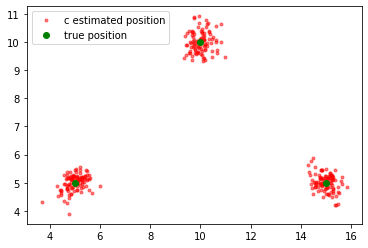

In [154]:
wdir = r'K:\vanderVoortN\FRC\dev\Fit2DGaussian_fresh\test\ThreeSpots'
try:
    os.mkdir(wdir)
except:
    pass
pxSize = 10
print('theoretical precision is %.3f nm' % (stdtheor * pxSize))
print('Precision using c optimisation is %.3f nm' % (stdC * pxSize))
print('Three Gaussian spots each with FWHM %.0f and %i photons with background %.2f cnts/px.' % 
      (paramsM[2] * 2.35 * pxSize, paramsM[4].astype(np.int), paramsM[3]))
plt.plot(pos[:,0], pos[:,1], 'r.', alpha = 0.5)
plt.plot(pos[:,2], pos[:,3], 'r.', alpha = 0.5)
plt.plot(pos[:,4], pos[:,5], 'r.', alpha = 0.5, label = 'c estimated position')
plt.plot(pos0[[0,2,4]],pos0[[1,3,5]], 'go', label = 'true position')
plt.legend()
plt.savefig(os.path.join(wdir, 'three-spot-localisations.png'), dpi = 300, bbox_inches = 'tight')

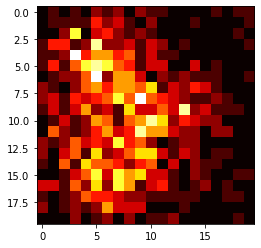

In [155]:
plt.imshow(im, cmap = 'hot')
plt.savefig(os.path.join(wdir, 'three-spot-example.png'), dpi = 300, bbox_inches = 'tight')

# test the accuracy of the initial spot finding routine 

## Triangle

In [140]:
xlen = 20
ylen = 20
pxSize = 10
model = np.zeros([xlen,ylen])
runs = 300

goodness_true = np.zeros(runs)
goodness_est = np.zeros(runs)
for run in range(runs):
    params0 = np.array([5, #x0
                        5,#y0
                        5, #A0
                        3, #sigma
                        1,#eps
                        0, #bg
                        10, # x1
                        10, #y1
                        5, #A1
                        5, #x2
                        15, #y2
                        5, #A2
                        0, #info
                        0, #wi_nowi
                        1, #fitbg
                        1, #ellipt_circ
                        2, #model
                        0]) # two Istar
    model = GaussFits.modelThree2DGaussian(params0, model)
    im = np.random.poisson(model)
    smooth_image = gaussian_filter(im.astype(np.double), 1)
    peaks = findPeaks(smooth_image)
    uniquepeaks = findUniquePoints(smooth_image, peaks)
    best_peaks = sortPeaks(uniquepeaks[:,:2], xlen, ylen, mindiff = 2)
    params_est = np.array([best_peaks[0,0], #x0
                        best_peaks[0,1],#y0
                        smooth_image[best_peaks[0,0], best_peaks[0,1]], #A0
                        4, #sigma
                        1,#eps
                        0, #bg
                        best_peaks[1,0], # x1
                        best_peaks[1,1], #y1
                        smooth_image[best_peaks[1,0], best_peaks[1,1]], #A1
                        best_peaks[2,0], #x2
                        best_peaks[2,1], #y2
                        smooth_image[best_peaks[2,0], best_peaks[2,1]], #A2
                        0, #info
                        0, #wi_nowi
                        1, #fitbg
                        1, #ellipt_circ
                        2, #model
                        0]) # two Istar
    fit_true = GaussFits.Fit2DGauss(params0, im)
    fit_est = GaussFits.Fit2DGauss(params_est, im)
    *_, goodness_true[run] = fit_true
    *_, goodness_est[run] = fit_est
    print(fit_true[12])

4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
1.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0


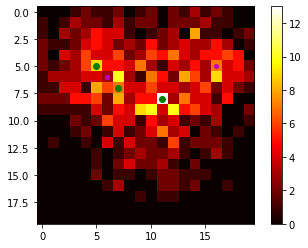

In [141]:
wdir = r'K:\vanderVoortN\FRC\dev\Fit2DGaussian_fresh\test\spotFinding'
try:
    os.mkdir(wdir)
except:
    pass
plt.imshow(im, cmap = 'hot')
plt.plot(peaks[:,1], peaks[:,0], 'm.')
plt.plot(best_peaks[:,1], best_peaks[:,0], 'go')
plt.colorbar()
plt.savefig(os.path.join(wdir, 'Triangle image (typ).png'), dpi = 300, bbox_inches = 'tight')

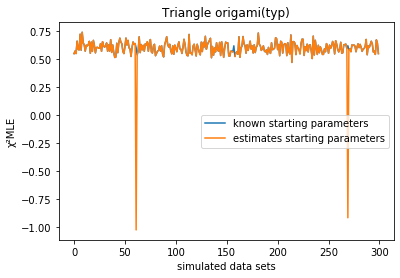

In [142]:
plt.plot(goodness_true, label = 'known starting parameters')
plt.plot(goodness_est, label = 'estimates starting parameters')
plt.ylabel('\u03C7\u00B2MLE')
plt.xlabel('simulated data sets')
plt.title('Triangle origami(typ)')
plt.legend()
plt.savefig(os.path.join(wdir,'Triangle fit goodness.png'), dpi = 300, bbox_inches = 'tight')

## Linear Origami

In [158]:
xlen = 20
ylen = 20
pxSize = 10
model = np.zeros([xlen,ylen])
runs = 100

goodness_true = np.zeros(runs)
goodness_est = np.zeros(runs)
for run in range(runs):
    params0 = np.array([5, #x0
                        5,#y0
                        5, #A0
                        3, #sigma
                        1,#eps
                        0, #bg
                        10, # x1
                        10, #y1
                        5, #A1
                        15, #x2
                        15, #y2
                        5, #A2
                        0, #info
                        0, #wi_nowi
                        1, #fitbg
                        1, #ellipt_circ
                        2, #model
                        0]) # two Istar
    model = GaussFits.modelThree2DGaussian(params0, model)
    im = np.random.poisson(model)
    smooth_image = gaussian_filter(im.astype(np.double), 1)
    peaks = findPeaks(smooth_image)
    uniquepeaks = findUniquePoints(smooth_image, peaks)
    best_peaks = sortPeaks(uniquepeaks[:,:2], xlen, ylen, mindiff = 2)
    params_est = np.array([best_peaks[0,0], #x0
                        best_peaks[0,1],#y0
                        smooth_image[best_peaks[0,0], best_peaks[0,1]], #A0
                        4, #sigma
                        1,#eps
                        0, #bg
                        best_peaks[1,0], # x1
                        best_peaks[1,1], #y1
                        smooth_image[best_peaks[1,0], best_peaks[1,1]], #A1
                        best_peaks[2,0], #x2
                        best_peaks[2,1], #y2
                        smooth_image[best_peaks[2,0], best_peaks[2,1]], #A2
                        0, #info
                        0, #wi_nowi
                        1, #fitbg
                        1, #ellipt_circ
                        2, #model
                        0]) # two Istar
    fit_true = GaussFits.Fit2DGauss(params0, im)
    fit_est = GaussFits.Fit2DGauss(params_est, im)
    *_, goodness_true[run] = fit_true
    *_, goodness_est[run] = fit_est
    print(fit_true[12])

4.0
4.0
1.0
4.0
4.0
1.0
4.0
4.0
1.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
1.0
4.0
4.0
1.0
4.0
1.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
1.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
1.0
1.0
4.0
4.0
1.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
1.0
4.0
4.0
4.0
4.0
1.0
1.0
1.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
1.0
4.0
4.0
4.0
1.0
1.0
4.0
1.0
4.0
1.0
4.0
4.0
4.0
4.0
4.0
4.0
1.0
4.0
1.0
4.0
4.0
4.0
4.0
4.0
4.0
1.0
4.0
4.0
not enough peaks found, try decreasing mindiff 
 setting remaining peaks at random
4.0
4.0
4.0
4.0
4.0
1.0
4.0
4.0
4.0
4.0
4.0
4.0
1.0
1.0
4.0
4.0
1.0
4.0
4.0
4.0
4.0
4.0
4.0
1.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
1.0
4.0
4.0
4.0
1.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
1.0
1.0
1.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
1.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
1.0
4.0
4.0
4.0
4.0
1.0
1.0
4.0
1.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
1.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4

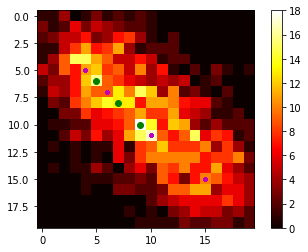

In [159]:
wdir = r'K:\vanderVoortN\FRC\dev\Fit2DGaussian_fresh\test\spotFinding'
try:
    os.mkdir(wdir)
except:
    pass
plt.imshow(im, cmap = 'hot')
plt.plot(peaks[:,1], peaks[:,0], 'm.')
plt.plot(best_peaks[:,1], best_peaks[:,0], 'go')
plt.colorbar()
plt.savefig(os.path.join(wdir, 'Linear image (typ).png'), dpi = 300, bbox_inches = 'tight')

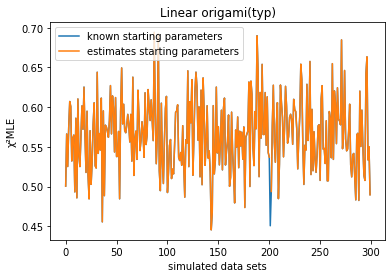

In [160]:
plt.plot(goodness_true, label = 'known starting parameters')
plt.plot(goodness_est, label = 'estimates starting parameters')
plt.ylabel('\u03C7\u00B2MLE')
plt.xlabel('simulated data sets')
plt.title('Linear origami(typ)')
plt.legend()
plt.savefig(os.path.join(wdir,'Linear fit goodness.png'), dpi = 300, bbox_inches = 'tight')

In [91]:
wdir = 'P:\CD95\sim\AV\Olga'
olgadat = np.genfromtxt(os.path.join(wdir, 'weighting_function.csv'), delimiter = '\t')

In [104]:
np.sum(olgadat[1:,29] * olgadat[1:,0]) / np.sum(olgadat[1:,29])

62.217285121504105

In [101]:
olgadat[0,29]

186.5

In [157]:
np.sqrt(2)*50

70.71067811865476